In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

1. Постройте модель, которая оценивает вероятность того, что в следующем году в африканской стране Central African Republic произойдет кризис на базе 5-летней истории (наличие кризиса, информация о валюте и внешнем долге)

2. Сколько ввп в среднем у стран с наименьшим количеством кризисов в спокойные годы?

3. В какой африканской стране кризисы происходят чаще?

### Предподготовка

In [3]:
###Загрузим базу данных
data = pd.read_csv("african_crises.csv", index_col = 0)

In [4]:
###Выберем только Кению
data1 = data[data["country"] == "Central African Republic"]

In [5]:
###Упростим себе жизнь
c = "inflation_crises"
e = "exch_usd"
###Найдем, когда был и не был банковский кризис
y_raw = data1[c].values

In [6]:
###Получим значения для тренировки предсказания
n = 0
M = []
while n != y_raw.shape[0]-6:
    M.append(y_raw[n+6])
    n += 1

In [7]:
M = np.array(M)

In [8]:
###Переходим к стоимости валюты относительно доллара
x_raw = data1[e].values

In [9]:
###Уменьшим значения до разброса от 0 до 1
for i in range(len(x_raw)):
    x_raw[i] = float(x_raw[i])
x_pre = x_raw/100

In [10]:
###Получим значения для тренировки предсказания
i = 0
X = []
Y = []
while i != x_pre.shape[0]-6:
    X.append(x_pre[i:i+6])
    i += 1

In [11]:
X = np.stack(X)

### Переход к тренировке

In [12]:
###Получаем линейную регрессию (строим модель)
xtr, xte, mtr, mte = train_test_split(X, M)

In [13]:
model1 = LinearRegression()

In [14]:
###Фитим модельку
model1.fit(xtr, mtr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print("mse =", mean_squared_error(mte, model1.predict(xte)), 
      "mae = ", mean_absolute_error(mte, model1.predict(xte)))
###Среднеквадратичная ошибка дает, конечно, не сильно большую ошибку, хоть и существенную,
###а вот среднеабсолютная совсем улетает :(

mse = 0.005350171165119737 mae =  0.06852595986517092


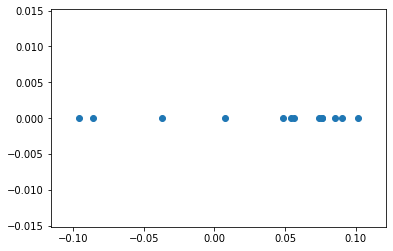

In [16]:
###Построим граф(конечно, с учетом того, что М принимает
###значение от 0 до 1, то это не совсем корректно), 
###хотя по значениям все достаточно близко к истине
plt.scatter(model1.predict(xte), mte)

In [17]:
X[-1]

array([4.71335058, 4.55335971, 4.90912289, 5.06961125, 4.97163104,
       4.7564136 ])

In [18]:
M[-1]

0

In [19]:
###А теперь предскажем
model1.predict([[4.71335058, 4.55335971, 4.90912289, 5.06961125, 4.97163104,
       4.7564136    ]])

array([0.00784146])

In [20]:
###Таким образом, модель приблизительно оказывается права о том, что кризиса не будет

Можно считать эксперимент успешным! (нет)

2. Сколько ввп в среднем у стран с наименьшим количеством кризисов в спокойные годы?

In [21]:
###Создадим фрейм только с бескризисными годами для всех стран
data2 = data[data['banking_crisis'] == "no_crisis"]
for i in range(1939, 1946):
    data2 = data2[data2['year'] != i]
for i in range(1939, 1946):
    data2 = data2[data2['year'] != i]

###найдем все страны, у которых хотя бы раз не было кризиса
cat, cnt = np.unique(data2["country"].values, return_counts = True)

In [22]:
###теперь найдем 3 страны, которые были в бескризисном положении дольше всех
l = [int(i) for i in cnt]
m = []

for i in range(3):
    m.append(l.index(max(l)))
    l[l.index(max(l))] = 0
    
for i in range(len(m)):
    d1 = data[data['country'] == cat[m[i]]]
    m1 = sum(d1["gdp_weighted_default"].values)
    m2 = d1.shape[0]
    print('in', cat[m[i]], 'the average debt in default vis-a-vis the GDP is', m1/m2)

in Egypt the average debt in default vis-a-vis the GDP is 0.015483870967741935
in South Africa the average debt in default vis-a-vis the GDP is 0.015789473684210523
in Algeria the average debt in default vis-a-vis the GDP is 0.01623529411764706



3. Теперь посмотрим, в какой стране чаще происходят кризисы. Для разнообразия исследуем валютные кризисы

In [23]:
data3 = data[data['currency_crises'] == 1]
cal, cnl = np.unique(data3['country'].values, return_counts = True)
k = [int(i) for i in cnl]
print("Most often, crises occurred in", cal[k.index(max(k))])

Most often, crises occurred in Zimbabwe
